In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from Network import GraphNet
from IRM_generative_torch import IRM_graph, clusterIndex
from IRM_post import Cmatrix_to_array, torch_posterior

# Giver samtlige mulige clusterings i form af
# nul-indekserede cluster arrays.
def allPermutations(n):
    perm = [[[1]]]
    for i in range(n-1):
        perm.append([])
        for partial in perm[i]:
            for j in range(1, max(partial) + 2):
                perm[i + 1].append(partial + [j])

    return np.array(perm[-1])-1


tensor([0., 0., 0., 1., 2., 2., 2., 3., 3., 3.])


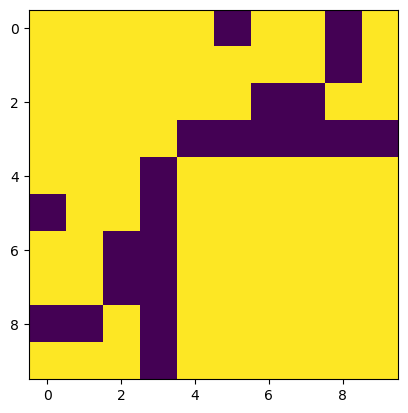

In [66]:
# Making the graph, and outputting cluster indexes.
N =  10
adjacency_matrix, clusters = IRM_graph(1, 0.5, 0.5, N = N)
cluster_idxs = clusterIndex(clusters)
plt.imshow(adjacency_matrix)
print(cluster_idxs)

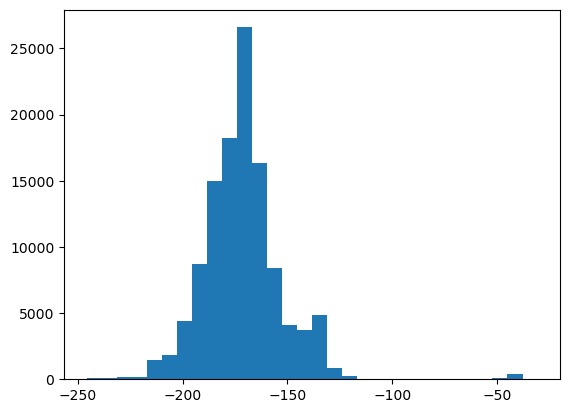

In [90]:
# Computing posteriors for all clusters.
clusters_all = allPermutations(N)
clusters_all_post = []
for cluster in clusters_all:
    posterior = (torch_posterior(adjacency_matrix, cluster, a=torch.tensor([0.5]), b=torch.tensor([0.5]), alpha = 1, log=True))
    clusters_all_post.append(posterior)

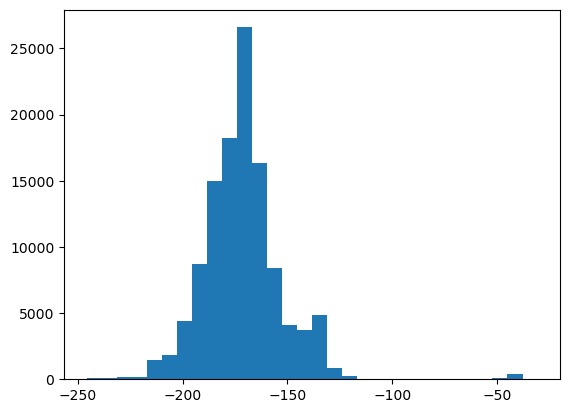

In [91]:
# Making historgram, not using inf values
cluster_post_noinf = np.array([post for post in clusters_all_post if not abs(post)==np.inf])
plt.hist(cluster_post_noinf, bins=30)
plt.show()

In [89]:
# Results
sortidxs=np.argsort(clusters_all_post)
top = 20
print("Total possible clusters: "+str(len(sortidxs)))
print("Ground truth: "+str(cluster_idxs.tolist()))
print("Top clusterings:")
for i, idx in enumerate(np.flip(sortidxs)[:top]):
    print(str(i+1)+": "+str(clusters_all[idx]))

Total possible clusters: 115975
Ground truth: [0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]
Top clusterings:
1: [0 0 0 1 0 0 0 0 0 0]
2: [0 0 0 0 0 0 0 0 0 1]
3: [0 1 0 0 0 0 0 0 0 0]
4: [0 0 0 0 1 0 0 0 0 0]
5: [0 0 1 1 1 0 1 1 0 1]
6: [0 0 0 0 0 0 0 1 0 0]
7: [0 1 1 1 1 1 1 1 1 1]
8: [0 0 0 0 0 0 1 0 0 0]
9: [0 0 0 0 0 1 0 0 0 0]
10: [0 0 1 0 0 0 0 0 0 0]
11: [0 0 1 0 0 0 1 1 0 0]
12: [0 0 1 1 1 1 1 1 0 1]
13: [0 0 1 0 0 0 0 1 0 0]
14: [0 1 0 0 0 0 0 0 1 0]
15: [0 0 1 0 0 0 1 0 0 0]
16: [0 1 1 1 1 0 1 1 1 1]
17: [0 0 0 0 0 0 0 0 1 0]
18: [0 1 0 0 0 0 0 0 0 1]
19: [0 0 0 0 1 0 0 0 0 1]
20: [0 1 0 0 1 0 0 0 0 0]
